In [1]:
import numpy as np
from scipy.special import digamma, gammaln

import time


import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2023)

from LTBM_clean import LTBM

In [2]:
## words as int from 0 to len(words) !!
v1, v2, v3, shared = 100, 100, 100, 0
words1 = list(range(v1+shared))
words2 = list(range(shared)) + list(range(v1+shared, v1+v2+shared))
words3 = list(range(shared)) + list(range(v1+v2+shared, v1+v2+v3+shared))
words_by_topic = [words1, words2, words3]
words = list(set(words1 + words2 + words3))

np.random.seed(42)
M = 120
P = 90
pi = [[.02, .02, .3], [.3, .3, .02]]

Q, L, K = 2, 3, 3

In [3]:
A = np.zeros((M, P))
A_clus = np.zeros((M, P))
W = [[0 for _ in range(P)] for _ in range(M)]

for i, j in np.ndindex(M, P):
    q = int(i / M * Q)
    l = int(j / P * L)

    if np.random.rand() < pi[q][l]:
        A[i, j] = 1
        A_clus[i, j] = l*Q + q + 1
        use = words_by_topic[l]
        W[i][j] = [[use[np.random.randint(len(use))] for _ in range(np.random.poisson(100))] for _ in range(1)]


<Axes: >

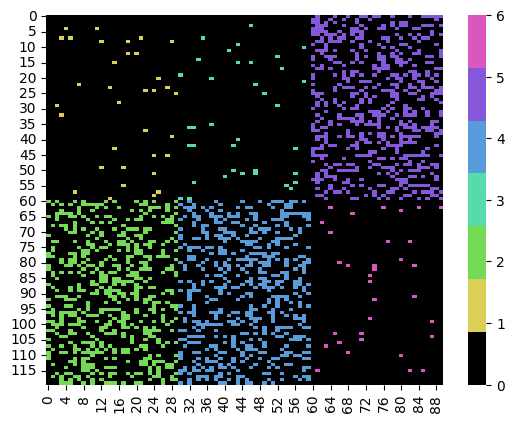

In [4]:
cmap = color_pal = sns.color_palette("hls", Q*L+1)
color_pal[0] = (0, 0, 0)

sns.heatmap(A_clus, cmap=cmap)

In [5]:
model = LTBM(A, W, words, np.ones(K), Q, L, K, tol=0.01)
model.fit(verbose=2)

Iteration 1: -1014581.957 (delta: inf)
Iteration 2: -1014575.492 (delta: 6.4646)
Iteration 3: -1014570.774 (delta: 4.7180)
Iteration 4: -1014566.473 (delta: 4.3015)
Iteration 5: -1014561.869 (delta: 4.6038)
Iteration 6: -1014556.493 (delta: 5.3762)
Iteration 7: -1014549.954 (delta: 6.5383)
Iteration 8: -1014541.860 (delta: 8.0940)
Iteration 9: -1014531.764 (delta: 10.0969)
Iteration 10: -1014519.127 (delta: 12.6365)
Iteration 11: -1014503.293 (delta: 15.8343)
Iteration 12: -1014483.448 (delta: 19.8450)
Iteration 13: -1014458.588 (delta: 24.8598)
Iteration 14: -1014427.477 (delta: 31.1105)
Iteration 15: -1014388.605 (delta: 38.8728)
Iteration 16: -1014340.136 (delta: 48.4686)
Iteration 17: -1014279.873 (delta: 60.2631)
Iteration 18: -1014205.217 (delta: 74.6560)
Iteration 19: -1014113.156 (delta: 92.0605)
Iteration 20: -1014000.291 (delta: 112.8658)
Iteration 21: -1013862.914 (delta: 137.3762)
Iteration 22: -1013697.197 (delta: 165.7172)
Iteration 23: -1013499.494 (delta: 197.7027)
Iter

<Axes: >

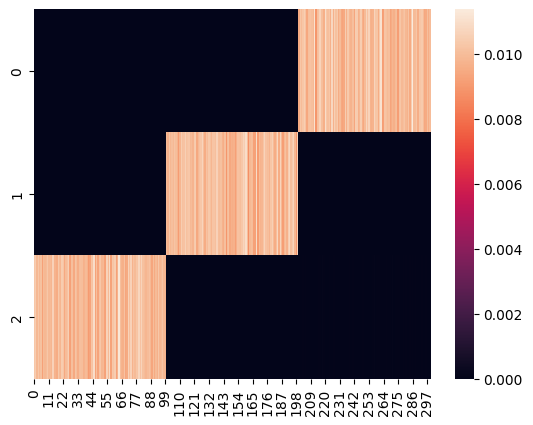

In [6]:
sns.heatmap(model.beta)

<Axes: >

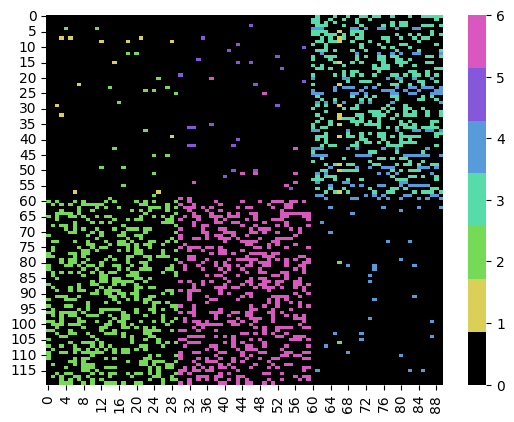

In [7]:
A_clust = model.A_clust()

sns.heatmap(A_clust, cmap=cmap)